<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_5_50_Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
url = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/50_Startups.csv'

In [4]:
# import dataset
data=pd.read_csv(url)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data1=data.rename({'R&D Spend':'RnD','Administration':'Admin','Marketing Spend':'Marketing'},axis=1)
data1.columns

Index(['RnD', 'Admin', 'Marketing', 'State', 'Profit'], dtype='object')

In [6]:
Data = data1.copy()

### EDA 

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RnD        50 non-null     float64
 1   Admin      50 non-null     float64
 2   Marketing  50 non-null     float64
 3   State      50 non-null     object 
 4   Profit     50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
# Changing data type of column State
Data['State']=Data['State'].astype('category')

In [9]:
#Statistical analysis
display(Data.describe())

,RnD,Admin,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
Data.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [11]:
#check for missing values
Data.isna().sum()

RnD          0
Admin        0
Marketing    0
State        0
Profit       0
dtype: int64

### Correlation Matrix

In [12]:
Data.corr()

,RnD,Admin,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### Visualisation

In [13]:
import plotly 
import plotly.express as px
import plotly.figure_factory as ff

In [14]:

fig = ff.create_scatterplotmatrix(Data, diag='histogram', index='Profit',
                                  height=800, width=800)
fig.show()

In [15]:
import plotly.graph_objs as go
from plotly.offline import iplot

for i, column in enumerate(Data.columns):
    if i !=3:
        box = go.Figure(go.Box(y = Data[column], name = column))
        iplot(box)

In [16]:
# Heat Map

fig = px.imshow(Data.corr())
fig.show()

In [17]:
# Profit is having a high correlation with R & D spend, 
#a good correlation with Marketing Spend and 
#a low correlation with Administration.

In [18]:
#Assinging values in X & Y
x = Data[['RnD','Admin','Marketing','State']]
y = Data['Profit']

In [19]:
x.head()

,RnD,Admin,Marketing,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
#Dummy Variables D1, D2 and D3 are highly correlated or multicollinear because if D1 and D2 are zero it is obvious D3 is 1. ie., if the data does not belong to State_California or State_Florida then it is sure, the data belongs to State_NewYork.
#So to avoid the dummy variable trap we have to drop one dummy variable while building the model.
#(X, drop_first=True), which will drop one dummy variable.
x=pd.get_dummies(x, drop_first=True)

In [22]:
x.tail()

,RnD,Admin,Marketing,State_Florida,State_New York
45,1000.23,124153.04,1903.93,0,1
46,1315.46,115816.21,297114.46,1,0
47,0.00,135426.92,0.00,0,0
48,542.05,51743.15,0.00,0,1
49,0.00,116983.80,45173.06,0,0


### Model1 - Using Linear Regression

In [23]:
#Splitting testdata into x_train,x_test,y_train,y_test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=101)

In [24]:
x_train.head()

,RnD,Admin,Marketing,State_Florida,State_New York
30,61994.48,115641.28,91131.24,1,0
15,114523.61,122616.84,261776.23,0,1
20,76253.86,113867.30,298664.47,0,0
43,15505.73,127382.30,35534.17,0,1
38,20229.59,65947.93,185265.10,0,1


In [25]:
y_train.head()

30     99937.59
15    129917.04
20    118474.03
43     69758.98
38     81229.06
Name: Profit, dtype: float64

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
regression = LinearRegression()

model = regression.fit(x_train,y_train)

In [27]:
#Prediciting Y from Linear regression Model
y_pred = model.predict(x_test)

In [28]:
print(y_pred)

[ 85607.15230664 155673.62480608 118154.79468613  97580.20464701
 120001.4968002  190210.80098637 115847.98929187  61877.18925431
  68681.67859679  45768.83480162 116334.51511941 110598.34252766
 165925.6565201   46040.61874891 133649.52471753 172649.80672945
  77899.89755242]


In [29]:
df=pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
37,85607.152307,89949.14
14,155673.624806,132602.65
21,118154.794686,111313.02
32,97580.204647,97427.84
22,120001.496800,110352.25
1,190210.800986,191792.06
26,115847.989292,105733.54
46,61877.189254,49490.75
42,68681.678597,71498.49
47,45768.834802,42559.73


In [59]:
metrics.mean_absolute_error(y_test , y_pred)

7980.207242197573

### Residuals Vs Fitted values

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



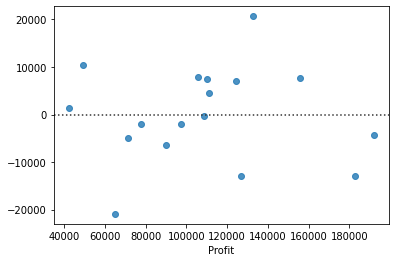

In [30]:
sns.residplot(y_test,y_pred)

### R2

In [31]:
from sklearn import metrics
print('Mean Absolute Error (MAE)       :', metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error              :', metrics.mean_squared_error(y_test , y_pred))
print('Root Mean Squared Error (RMSE)  :', np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('R Square                        :', metrics.r2_score(y_test , y_pred))

Mean Absolute Error (MAE)       : 7980.207242197573
Mean Squared Error              : 102271466.3424996
Root Mean Squared Error (RMSE)  : 10112.935594697496
R Square                        : 0.9387894202464991


In [32]:
print(regression.intercept_)

42891.65376236457


In [33]:
cdf=pd.DataFrame(regression.coef_, x_train.columns, columns=['Coefficients'])
cdf

,Coefficients
RnD,0.794844
Admin,0.021245
Marketing,0.033484
State_Florida,5530.961448
State_New York,-347.476535


### Model2 - Using DecisionTrees

In [34]:
 from sklearn.tree import DecisionTreeRegressor

In [35]:
dt = DecisionTreeRegressor()

In [36]:
model2 = dt.fit(x_train,y_train)

In [37]:
y_hat = model2.predict(x_test)
y_hat

array([ 96712.8 , 149759.96, 118474.03, 107404.34, 108733.99, 192261.83,
       141585.52,  14681.4 ,  78239.91,  14681.4 , 118474.03, 144259.4 ,
       156122.51,  14681.4 , 141585.52, 166187.94,  90708.19])

In [38]:
df2=pd.DataFrame(data={'Predicted value':y_hat,'Actual Value':y_test})
df2

,Predicted value,Actual Value
37,96712.80,89949.14
14,149759.96,132602.65
21,118474.03,111313.02
32,107404.34,97427.84
22,108733.99,110352.25
1,192261.83,191792.06
26,141585.52,105733.54
46,14681.40,49490.75
42,78239.91,71498.49
47,14681.40,42559.73


In [39]:
print('Mean Absolute Error (MAE)       :', metrics.mean_absolute_error(y_test , y_hat))
print('Mean Squared Error              :', metrics.mean_squared_error(y_test , y_hat))
print('Root Mean Squared Error (RMSE)  :', np.sqrt(metrics.mean_squared_error(y_test , y_hat)))
print('R Square                        :', metrics.r2_score(y_test , y_hat))

Mean Absolute Error (MAE)       : 17071.204117647056
Mean Squared Error              : 495980667.7727705
Root Mean Squared Error (RMSE)  : 22270.623425777074
R Square                        : 0.7031502010616644


In [40]:
# Decision Tree Acuracy is less than Linear regression model.

### Model  - Using Statsmodel package

In [41]:
Data.groupby('State')['Profit'].mean()

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



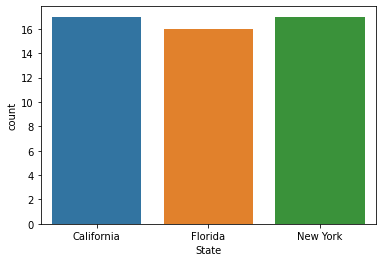

In [42]:
sns.countplot(Data.State)
plt.show()

In [43]:
# Profit is equal around states. So we can drop States column.

In [44]:
model3 = smf.ols("Profit~RnD+Admin+Marketing", data=Data).fit()

In [45]:
# Finding Coefficient parameters
model3.params

Intercept    50122.192990
RnD              0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [46]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        08:38:25   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

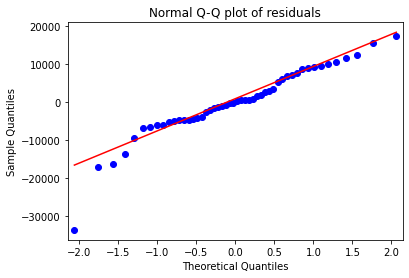

In [49]:
sm.qqplot(model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [50]:
#Prediciting Y from Linear regression Model
Profit_pred = model3.predict(Data.iloc[:,[0,1,2]])

In [51]:
df3=pd.DataFrame(data={'Predicted value':np.round(Profit_pred,2),'Actual Value':Data['Profit']})
df3.head(10)

,Predicted value,Actual Value
0,192521.25,192261.83
1,189156.77,191792.06
2,182147.28,191050.39
3,173696.70,182901.99
4,172139.51,166187.94
5,163580.78,156991.12
6,158114.10,156122.51
7,160021.36,155752.60
8,151741.70,152211.77
9,154884.68,149759.96


Text(0, 0.5, 'Standardized Residual')

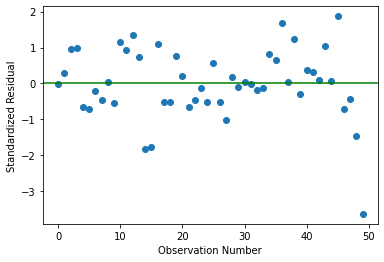

In [52]:
plt.plot(model3.resid_pearson,'o');
plt.axhline(y=0,color='green');
plt.xlabel("Observation Number");
plt.ylabel("Standardized Residual")

# resudal data shows erros are randomly distributed

### Model Deletion Diagnostics (checking Outliers or Influencers)

In [60]:
# Get influencers using cook's distance
(c,_)=model3.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<ipython-input-61-20404a9bdf8f>:3: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



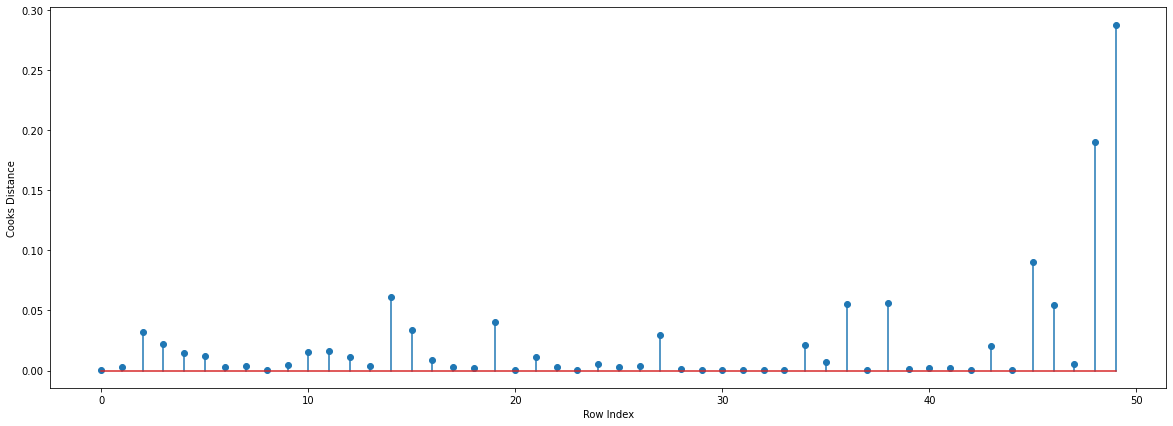

In [61]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

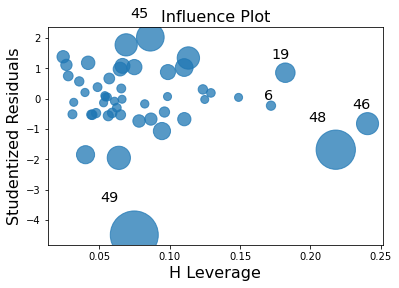

In [63]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model3)
plt.show()

### We can improve accuracy by removing influencial points

In [69]:
#while model3.rsquared < 0.98:
for c in [np.max(c)<1]:
        model4=smf.ols("Profit~RnD+Admin+Marketing",data=Data).fit()
        (c,_)=model4.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data=Data.drop(Data.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data
else:
        final_model=smf.ols("Profit~RnD+Admin+Marketing",data=Data).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9507459940683246


In [70]:
pd.DataFrame({'Name': ['Linear_sklearn','Decision_Tree','Stats_Model'], 'R2_Score':[93.87,71.11,95.1]})

,Name,R2_Score
0,Linear_sklearn,93.87
1,Decision_Tree,71.11
2,Stats_Model,95.10


### END